In [17]:
from sklearn.datasets import fetch_20newsgroups
data=fetch_20newsgroups(subset='train',remove=('headers', 'footers', 'quotes'))

In [18]:
X=data.data[:1000]
y=data.target[:1000]

In [21]:
X[1]

u"A fair number of brave souls who upgraded their SI clock oscillator have\nshared their experiences for this poll. Please send a brief message detailing\nyour experiences with the procedure. Top speed attained, CPU rated speed,\nadd on cards and adapters, heat sinks, hour of usage per day, floppy disk\nfunctionality with 800 and 1.4 m floppies are especially requested.\n\nI will be summarizing in the next two days, so please add to the network\nknowledge base if you have done the clock upgrade and haven't answered this\npoll. Thanks."

In [22]:
import nltk
from nltk.stem.porter import PorterStemmer
stemmer = PorterStemmer()
def stem_tokens(tokens, stemmer):
    stemmed = []
    for item in tokens:
        stemmed.append(stemmer.stem(item))
    return stemmed

def tokenize(text):
    tokens = nltk.word_tokenize(text)
    stems = stem_tokens(tokens, stemmer)
    return stems

In [23]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [24]:
vectorizer = TfidfVectorizer(tokenizer=tokenize)
X_v = vectorizer.fit_transform(X)

In [25]:
print X_v

  (0, 11025)	0.101649010007
  (0, 19070)	0.0774826158508
  (0, 12342)	0.163065429643
  (0, 13257)	0.0412454995324
  (0, 25052)	0.0446833494673
  (0, 14125)	0.107146054307
  (0, 24316)	0.10564903587
  (0, 18297)	0.0467616231133
  (0, 13461)	0.107931190089
  (0, 16177)	0.0863124777792
  (0, 24325)	0.0755488258694
  (0, 19408)	0.108742945657
  (0, 24994)	0.0741458181374
  (0, 21717)	0.136759712089
  (0, 11350)	0.102270979938
  (0, 17457)	0.0883371618188
  (0, 16931)	0.11535769353
  (0, 22493)	0.172774087304
  (0, 8937)	0.0533622768678
  (0, 15013)	0.0602234539753
  (0, 7254)	0.053774412619
  (0, 14337)	0.070598347602
  (0, 8437)	0.107146054307
  (0, 18124)	0.0670439012332
  (0, 20388)	0.107931190089
  :	:
  (999, 14021)	0.0628412627919
  (999, 21511)	0.0249800584457
  (999, 20134)	0.0197054609021
  (999, 24289)	0.0342099544501
  (999, 10821)	0.0325415817924
  (999, 8911)	0.0766455436417
  (999, 12276)	0.0137826160832
  (999, 8144)	0.053532120791
  (999, 22803)	0.117469868703
  (999, 997)	

In [87]:
from sklearn.cluster import KMeans
y_pred = KMeans(n_clusters=20).fit_predict(X_v)

In [26]:
from sklearn.manifold import TSNE

In [27]:
model = TSNE(n_components=2, random_state=0)

In [28]:
X_tsne=model.fit_transform(X_v.toarray()) 

In [29]:
X_tsne

array([[ 22.40639418,  -5.25713072],
       [ 18.64065796,   3.55722337],
       [ 29.89824538, -19.98439667],
       ..., 
       [ 24.32196662, -26.33486418],
       [  5.01813226,  13.45134354],
       [ 14.93054315, -38.21490522]])

In [43]:
X_tsne[:10][0]

array([ 22.40639418,  -5.25713072])

In [32]:
y[0]

7

In [47]:
ax0=[]
ax1=[]
for i in X_tsne:
    ax0.append(i[0])
    ax1.append(i[1])

In [88]:
from pandas import DataFrame
dl={'ax0':ax0, 'ax1':ax1, 'y':y, 'y_pred': y_pred}
labled_data=DataFrame(data=dl)

In [89]:
labled_data

,ax0,ax1,y,y_pred
0,22.406394,-5.257131,7,8
1,18.640658,3.557223,4,8
2,29.898245,-19.984397,4,2
3,24.168294,-18.909106,1,2
4,29.078716,-32.624122,14,2
5,14.472633,-0.888366,16,2
6,27.556460,-17.884888,13,2
7,23.498369,-22.571895,3,0
8,31.706228,-7.391139,2,8
9,33.868595,-34.602121,4,8


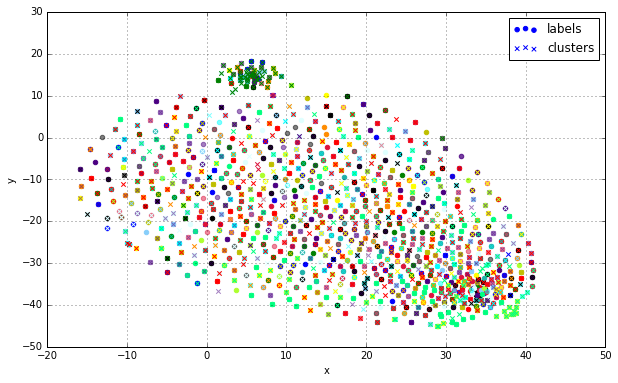

In [95]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize = (10, 6))

plt.scatter(labled_data[labled_data['y'] == 1]['ax0'], 
            labled_data[labled_data['y'] == 1]['ax1'], 
            alpha = 1, 
            color = 'b')

plt.scatter(labled_data[labled_data['y_pred'] == 1]['ax0'], 
            labled_data[labled_data['y_pred'] == 1]['ax1'], 
            alpha = 1, 
            color = 'b', marker='x')

plt.scatter(labled_data[labled_data['y']==2]['ax0'],
            labled_data[labled_data['y']==2]['ax1'],
            alpha = 1,
            color = 'r')

plt.scatter(labled_data[labled_data['y']==3]['ax0'],
            labled_data[labled_data['y']==3]['ax1'],
            alpha = 1,
            color = 'g')

plt.scatter(labled_data[labled_data['y']==4]['ax0'],
            labled_data[labled_data['y']==4]['ax1'],
            alpha = 1,
            color = 'y')

plt.scatter(labled_data[labled_data['y']==5]['ax0'],
            labled_data[labled_data['y']==5]['ax1'],
            alpha = 1,
            color = '#FF8C00')

plt.scatter(labled_data[labled_data['y']==6]['ax0'],
            labled_data[labled_data['y']==6]['ax1'],
            alpha = 0.50,
            color = '#000000')

plt.scatter(labled_data[labled_data['y']==7]['ax0'],
            labled_data[labled_data['y']==7]['ax1'],
            alpha = 1,
            color = '#000000')
plt.scatter(labled_data[labled_data['y']==8]['ax0'],
            labled_data[labled_data['y']==8]['ax1'],
            alpha = 0.50,
            color = '#4B0082')
plt.scatter(labled_data[labled_data['y']==9]['ax0'],
            labled_data[labled_data['y']==9]['ax1'],
            alpha = 1,
            color = '#4B0082')
plt.scatter(labled_data[labled_data['y']==10]['ax0'],
            labled_data[labled_data['y']==10]['ax1'],
            alpha = 0.50,
            color = '#DC143C')
plt.scatter(labled_data[labled_data['y']==11]['ax0'],
            labled_data[labled_data['y']==11]['ax1'],
            alpha = 1,
            color = '#DC143C')
plt.scatter(labled_data[labled_data['y']==12]['ax0'],
            labled_data[labled_data['y']==12]['ax1'],
            alpha = 1,
            color = '#E0FFFF')
plt.scatter(labled_data[labled_data['y']==13]['ax0'],
            labled_data[labled_data['y']==13]['ax1'],
            alpha = 1,
            color = '#20B2AA')
plt.scatter(labled_data[labled_data['y']==14]['ax0'],
            labled_data[labled_data['y']==14]['ax1'],
            alpha = 1,
            color = '#87CEFA')
plt.scatter(labled_data[labled_data['y']==15]['ax0'],
            labled_data[labled_data['y']==15]['ax1'],
            alpha = 1,
            color = '#00FF7F')
plt.scatter(labled_data[labled_data['y']==16]['ax0'],
            labled_data[labled_data['y']==16]['ax1'],
            alpha = 1,
            color = '#FFFF00')
plt.scatter(labled_data[labled_data['y']==17]['ax0'],
            labled_data[labled_data['y']==17]['ax1'],
            alpha = 1,
            color = '#ADFF2F')
plt.scatter(labled_data[labled_data['y']==18]['ax0'],
            labled_data[labled_data['y']==18]['ax1'],
            alpha = 1,
            color = '#00FFFF')
plt.scatter(labled_data[labled_data['y']==19]['ax0'],
            labled_data[labled_data['y']==19]['ax1'],
            alpha = 0.50,
            color = '#00FFFF')
plt.scatter(labled_data[labled_data['y']==20]['ax0'],
            labled_data[labled_data['y']==20]['ax1'],
            alpha = 1,
            color = '#FF1493')

plt.scatter(labled_data[labled_data['y_pred']==2]['ax0'],
            labled_data[labled_data['y_pred']==2]['ax1'],
            alpha = 1,
            color = 'r', marker='x')

plt.scatter(labled_data[labled_data['y_pred']==3]['ax0'],
            labled_data[labled_data['y_pred']==3]['ax1'],
            alpha = 1,
            color = 'g', marker='x')

plt.scatter(labled_data[labled_data['y_pred']==4]['ax0'],
            labled_data[labled_data['y_pred']==4]['ax1'],
            alpha = 1,
            color = 'y', marker='x')

plt.scatter(labled_data[labled_data['y_pred']==5]['ax0'],
            labled_data[labled_data['y_pred']==5]['ax1'],
            alpha = 1,
            color = '#FF8C00', marker='x')

plt.scatter(labled_data[labled_data['y_pred']==6]['ax0'],
            labled_data[labled_data['y_pred']==6]['ax1'],
            alpha = 0.50,
            color = '#000000', marker='x')

plt.scatter(labled_data[labled_data['y_pred']==7]['ax0'],
            labled_data[labled_data['y_pred']==7]['ax1'],
            alpha = 1,
            color = '#000000', marker='x')
plt.scatter(labled_data[labled_data['y_pred']==8]['ax0'],
            labled_data[labled_data['y_pred']==8]['ax1'],
            alpha = 0.50,
            color = '#4B0082', marker='x')
plt.scatter(labled_data[labled_data['y_pred']==9]['ax0'],
            labled_data[labled_data['y_pred']==9]['ax1'],
            alpha = 1,
            color = '#4B0082', marker='x')
plt.scatter(labled_data[labled_data['y_pred']==10]['ax0'],
            labled_data[labled_data['y_pred']==10]['ax1'],
            alpha = 0.50,
            color = '#DC143C', marker='x')
plt.scatter(labled_data[labled_data['y_pred']==11]['ax0'],
            labled_data[labled_data['y_pred']==11]['ax1'],
            alpha = 1,
            color = '#DC143C', marker='x')
plt.scatter(labled_data[labled_data['y_pred']==12]['ax0'],
            labled_data[labled_data['y_pred']==12]['ax1'],
            alpha = 1,
            color = '#E0FFFF', marker='x')
plt.scatter(labled_data[labled_data['y_pred']==13]['ax0'],
            labled_data[labled_data['y_pred']==13]['ax1'],
            alpha = 1,
            color = '#20B2AA', marker='x')
plt.scatter(labled_data[labled_data['y_pred']==14]['ax0'],
            labled_data[labled_data['y_pred']==14]['ax1'],
            alpha = 1,
            color = '#87CEFA', marker='x')
plt.scatter(labled_data[labled_data['y_pred']==15]['ax0'],
            labled_data[labled_data['y_pred']==15]['ax1'],
            alpha = 1,
            color = '#00FF7F', marker='x')
plt.scatter(labled_data[labled_data['y_pred']==16]['ax0'],
            labled_data[labled_data['y_pred']==16]['ax1'],
            alpha = 1,
            color = '#FFFF00', marker='x')
plt.scatter(labled_data[labled_data['y_pred']==17]['ax0'],
            labled_data[labled_data['y_pred']==17]['ax1'],
            alpha = 1,
            color = '#ADFF2F', marker='x')
plt.scatter(labled_data[labled_data['y_pred']==18]['ax0'],
            labled_data[labled_data['y_pred']==18]['ax1'],
            alpha = 1,
            color = '#00FFFF', marker='x')
plt.scatter(labled_data[labled_data['y_pred']==19]['ax0'],
            labled_data[labled_data['y_pred']==19]['ax1'],
            alpha = 0.50,
            color = '#00FFFF', marker='x')
plt.scatter(labled_data[labled_data['y_pred']==20]['ax0'],
            labled_data[labled_data['y_pred']==20]['ax1'],
            alpha = 1,
            color = '#FF1493', marker='x')

plt.legend(['labels', 'clusters'])

plt.xlabel('x')
plt.ylabel('y')
plt.grid()